# Problem 1

### Getting familiar with loading, visualizing and operating on multivariate data

A Hess diagram is a 2D plot coded by a third quantity.

Here's an example from the [astroML documentation](https://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html) showing the temperature and surface gravity (how strongly the star would pull on you if you could stand on it's surface, including the effect of rotation), color coded on the left by density, and on the right by metallicity (measured here as the ratio of iron to hydrogen) with density contours.


<img src="https://www.astroml.org/_images/plot_SDSS_SSPP_1.png">

From http://das.sdss.org/va/stripe_82_variability/SDSS_82_public/, download eight HLC\*fits.gz files (and recall how you can use `astropy.io.fits` to load these)

The HLC files are each different bands on the sky.

For each HLC file, separate stars and galaxies by using the `MEAN_OBJECT_TYPE` column and making a cut with value > 5 to find stars.

For each HLC file, and separately for stars and galaxies make a 3-panel plot.

In the left plot show `r` vs `g-i` color coded by density (recall we did this with `seaborn`'s `jointplot`, but you can use whatever).

Estimate a bivariate distribution for `density(r, g-i)` this sample (recall we did with `seaborn`'s `jointplot` use `kde`, but you can use whatever).

In the middle and right panel, again plot `r` vs `g-i`, but now color-coded by proper motion in RA, and Dec. Overlay the density contors.

Comment on the structure in stars vs galaxies, and the evolution with position on the sky in each HLC.


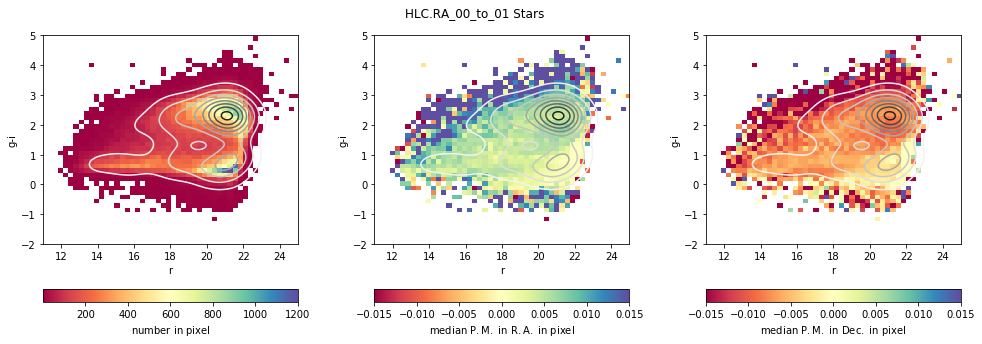

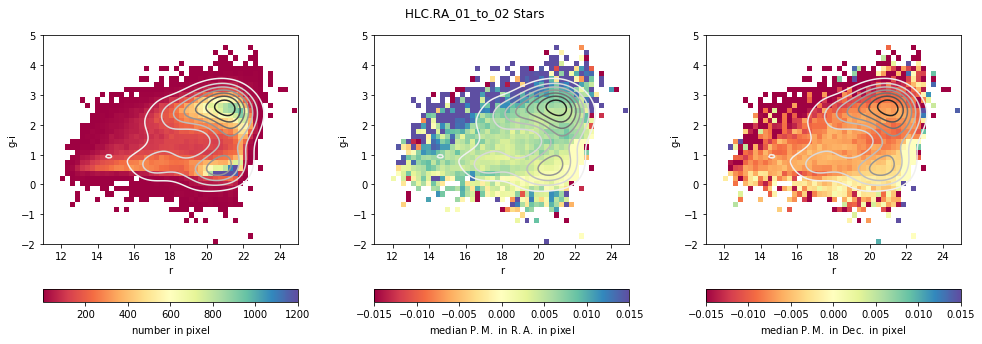

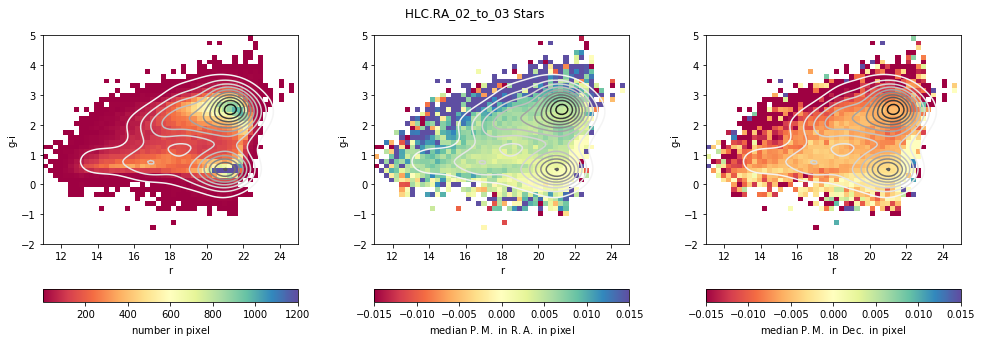

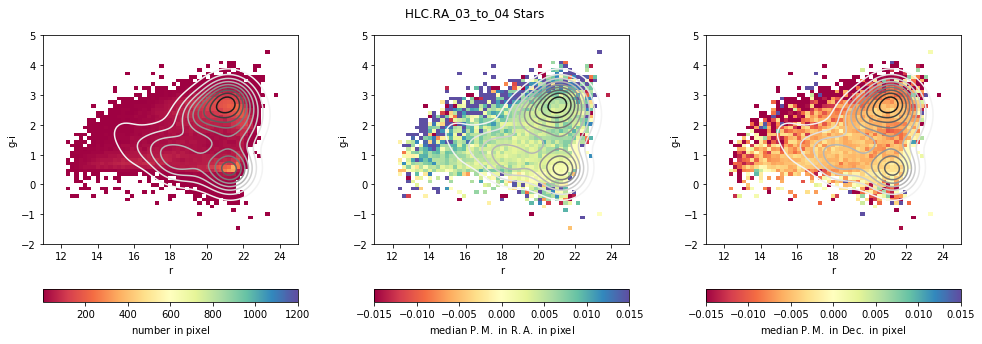

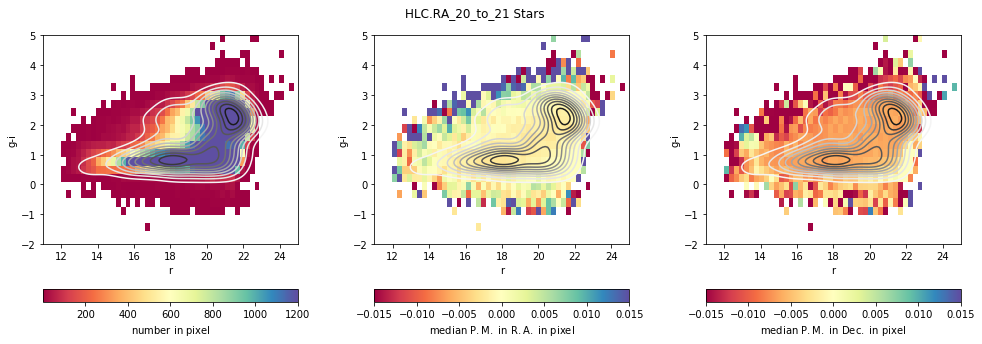

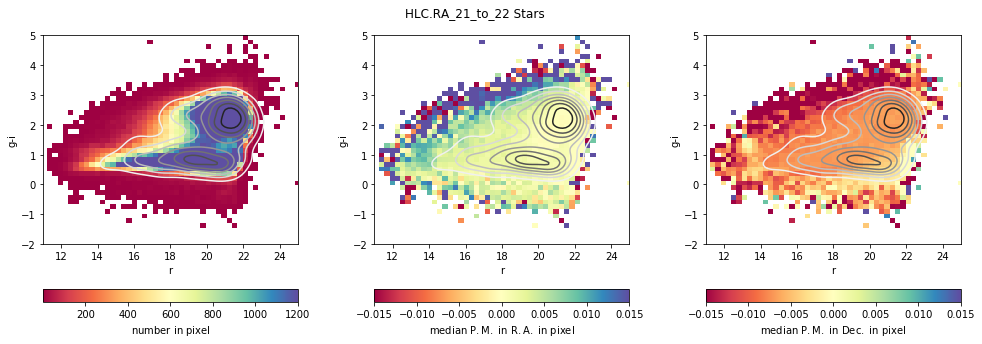

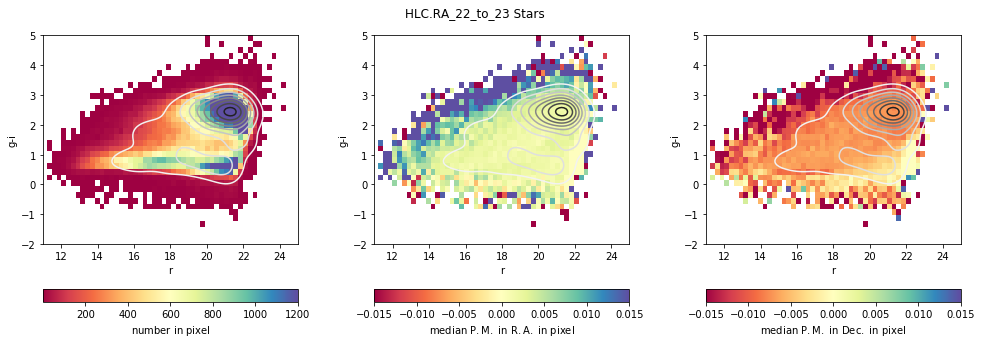

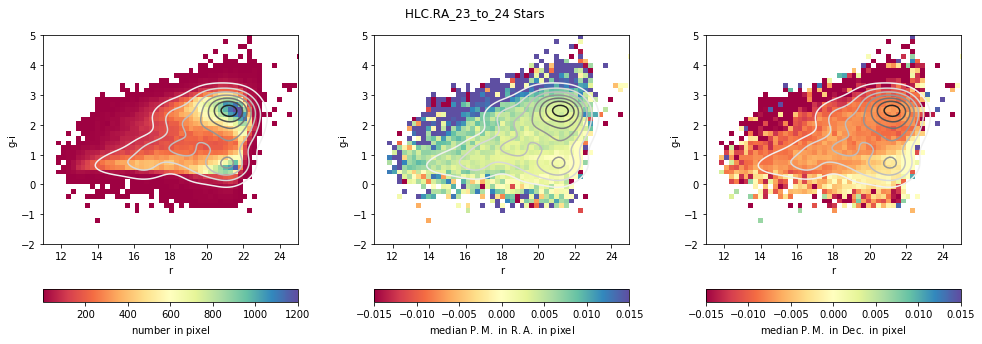

In [3]:
from astropy.io import fits
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

HLC_files = ['HLC.RA_00_to_01','HLC.RA_01_to_02','HLC.RA_02_to_03','HLC.RA_03_to_04','HLC.RA_20_to_21','HLC.RA_21_to_22','HLC.RA_22_to_23','HLC.RA_23_to_24']

for i in range(len(HLC_files)):
    
    a = fits.open('../../../data_astr596/'+HLC_files[i]+'.fits.gz')
    ind_nonzero = np.where(np.all([a[1].data['mean_psfmag'][:,1]!=0,a[1].data['mean_psfmag'][:,2]!=0,a[1].data['mean_psfmag'][:,3]!=0],axis=0))
    ind_star = np.where(a[1].data['mean_object_type'][ind_nonzero]>5)
    
    # u, g, r, i, z magnitude in a[1].data['mean_psfmag']
    mag_r = a[1].data['mean_psfmag'][:,2]
    mag_gi = a[1].data['mean_psfmag'][:,1]-a[1].data['mean_psfmag'][:,3]

    # proper motion data
    pmra = a[1].data['ra_pm']
    pmdec = a[1].data['dec_pm']
    #print(np.max(pmra),np.min(pmdec))
    
    # set color map
    cmap = plt.cm.Spectral
    cmap.set_bad('w', 1.)

    # start plotting figures
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace=0.30, left=0.1, right=0.95, bottom=0.07, top=0.9)

    ax1 = fig.add_subplot(1,3,1)
    count, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_star], mag_gi[ind_nonzero][ind_star], pmra[ind_nonzero][ind_star], statistic='count',bins=50)
    count[np.where(count==0)] = np.nan
    #print (np.median(np.isfinite(count)),np.std(np.isfinite(count)))
    ax1 = plt.imshow(count.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=1,vmax=1200)    
    ax1 = sns.kdeplot(mag_r[ind_nonzero][ind_star][::1000], mag_gi[ind_nonzero][ind_star][::1000],cmap='Greys')
    ax1.set_xlabel('r')
    ax1.set_ylabel('g-i')
    ax1.set_xlim([11,25])
    ax1.set_ylim([-2,5])
    ax1 = plt.colorbar(orientation='horizontal')
    ax1.set_label(r'$\mathrm{number\ in\ pixel}$')
    
    ax2 = fig.add_subplot(1,3,2)
    pmra_med, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_star], mag_gi[ind_nonzero][ind_star], pmra[ind_nonzero][ind_star], statistic='median',bins=50)
    #print (np.median(np.isfinite(pmra_med)),np.std(np.isfinite(pmra_med)))
    ax2 = plt.imshow(pmra_med.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=-0.015,vmax=0.015)    
    ax2 = sns.kdeplot(mag_r[ind_nonzero][ind_star][::1000], mag_gi[ind_nonzero][ind_star][::1000],cmap='Greys')
    ax2.set_xlabel('r')
    ax2.set_ylabel('g-i')
    ax2.set_xlim([11,25])
    ax2.set_ylim([-2,5])
    ax2 = plt.colorbar(orientation='horizontal')
    ax2.set_label(r'$\mathrm{median\ P.M.\ in\ R.A.\ in\ pixel}$')   
    
    ax3 = fig.add_subplot(1,3,3)
    pmdec_med, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_star], mag_gi[ind_nonzero][ind_star], pmdec[ind_nonzero][ind_star], statistic='median',bins=50)
    #print (np.median(np.isfinite(pmdec_med)),np.std(np.isfinite(pmdec_med)))
    ax3 = plt.imshow(pmdec_med.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=-0.015,vmax=0.015)    
    ax3 = sns.kdeplot(mag_r[ind_nonzero][ind_star][::1000], mag_gi[ind_nonzero][ind_star][::1000],cmap='Greys')
    ax3.set_xlabel('r')
    ax3.set_ylabel('g-i')
    ax3.set_xlim([11,25])
    ax3.set_ylim([-2,5])
    ax3 = plt.colorbar(orientation='horizontal')
    ax3.set_label(r'$\mathrm{median\ P.M.\ in\ Dec.\ in\ pixel}$')
    
    plt.suptitle(HLC_files[i]+' Stars')
    

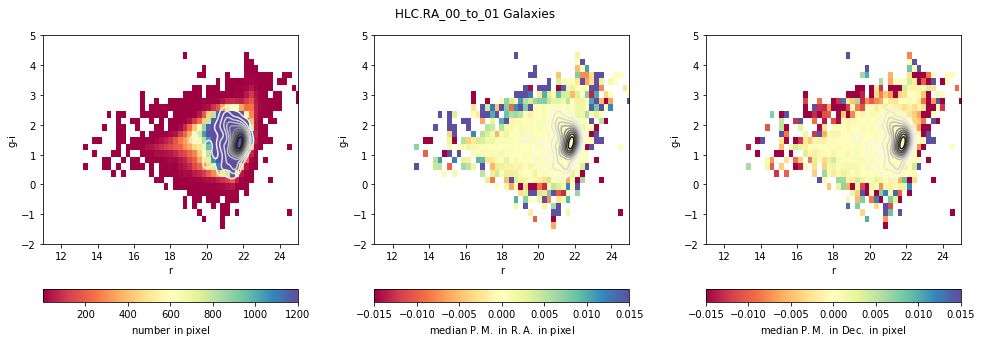

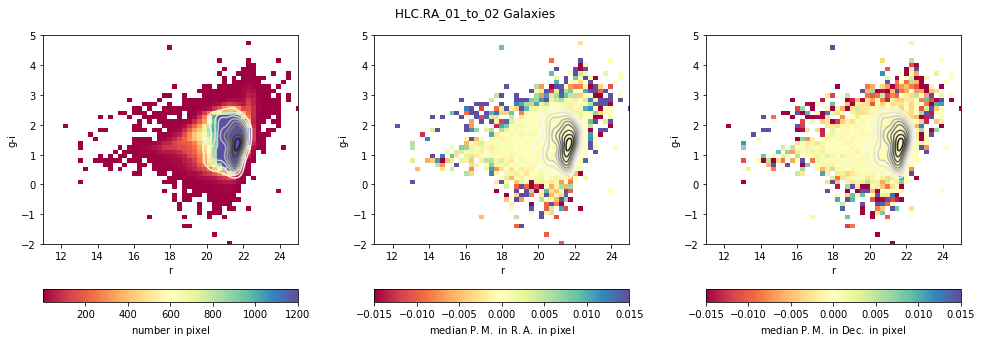

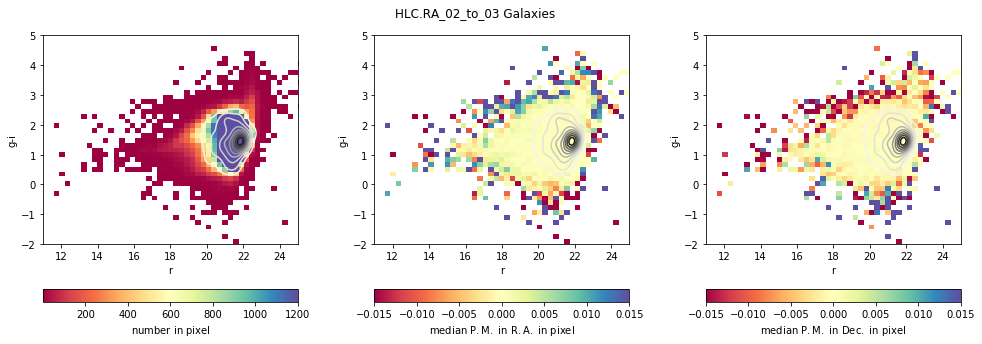

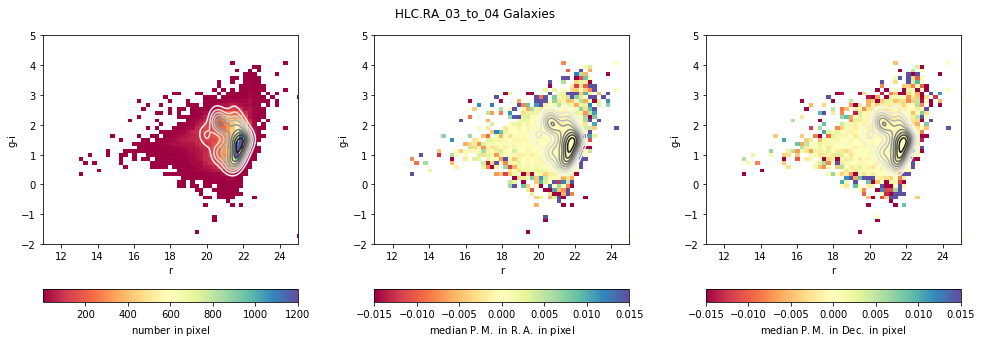

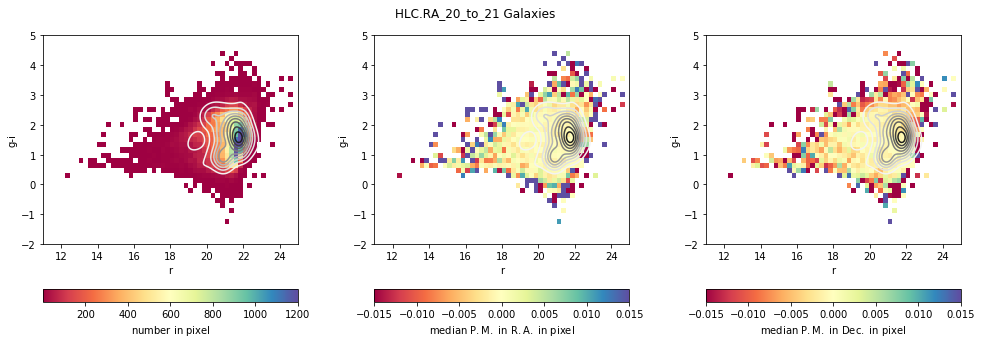

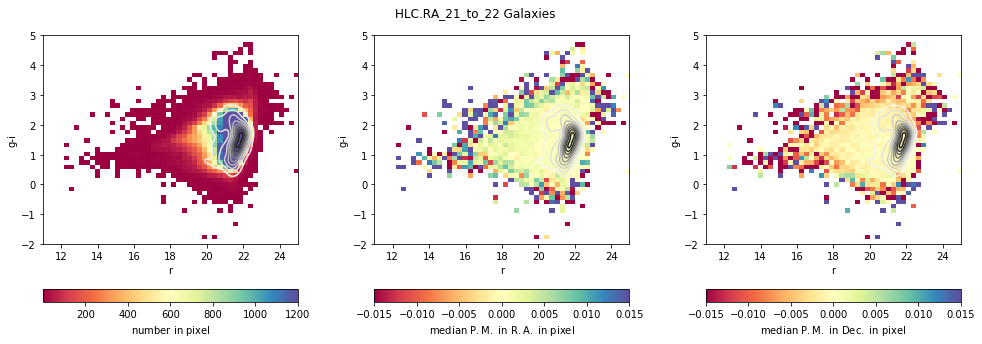

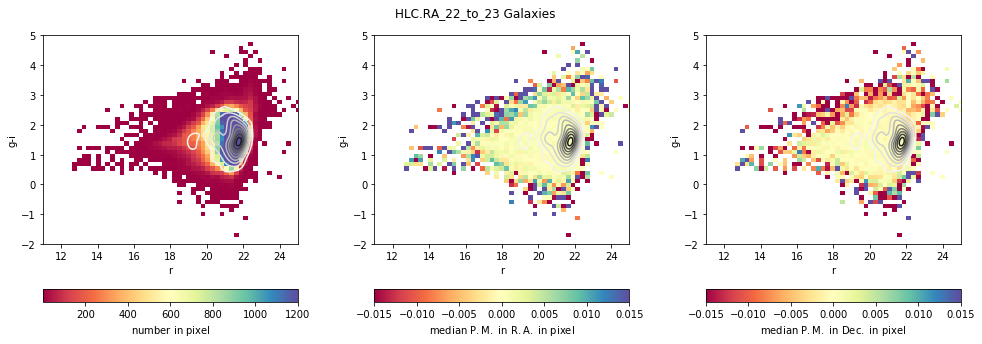

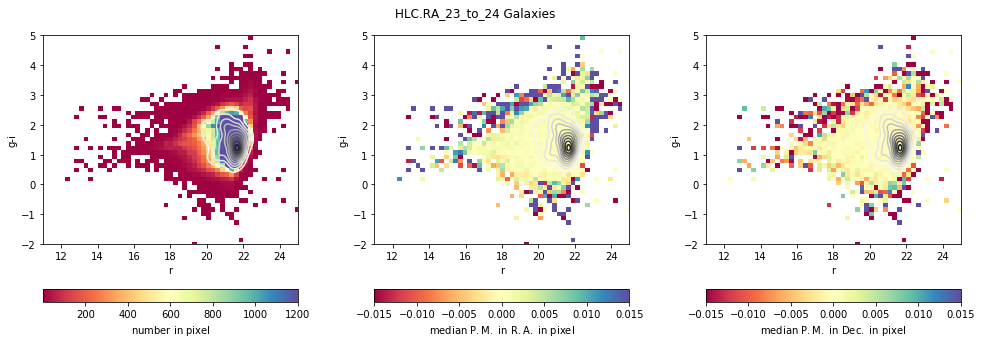

In [4]:
from astropy.io import fits
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

HLC_files = ['HLC.RA_00_to_01','HLC.RA_01_to_02','HLC.RA_02_to_03','HLC.RA_03_to_04','HLC.RA_20_to_21','HLC.RA_21_to_22','HLC.RA_22_to_23','HLC.RA_23_to_24']

for i in range(len(HLC_files)):
    
    a = fits.open('../../../data_astr596/'+HLC_files[i]+'.fits.gz')
    ind_nonzero = np.where(np.all([a[1].data['mean_psfmag'][:,1]!=0,a[1].data['mean_psfmag'][:,2]!=0,a[1].data['mean_psfmag'][:,3]!=0],axis=0))
    ind_gal = np.where(a[1].data['mean_object_type'][ind_nonzero]<5)
    
    # u, g, r, i, z magnitude in a[1].data['mean_psfmag']
    mag_r = a[1].data['mean_psfmag'][:,2]
    mag_gi = a[1].data['mean_psfmag'][:,1]-a[1].data['mean_psfmag'][:,3]

    # proper motion data
    pmra = a[1].data['ra_pm']
    pmdec = a[1].data['dec_pm']
    #print(np.max(pmra),np.min(pmdec))
    
    # set color map
    cmap = plt.cm.Spectral
    cmap.set_bad('w', 1.)

    # start plotting figures
    fig = plt.figure(figsize=(15,5))
    fig.subplots_adjust(wspace=0.30, left=0.1, right=0.95, bottom=0.07, top=0.9)

    ax1 = fig.add_subplot(1,3,1)
    count, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_gal], mag_gi[ind_nonzero][ind_gal], pmra[ind_nonzero][ind_gal], statistic='count',bins=50)
    count[np.where(count==0)] = np.nan
    #print (np.median(np.isfinite(count)),np.std(np.isfinite(count)))
    ax1 = plt.imshow(count.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=1,vmax=1200)    
    ax1 = sns.kdeplot(mag_r[ind_nonzero][ind_gal][::1000], mag_gi[ind_nonzero][ind_gal][::1000],cmap='Greys')
    ax1.set_xlabel('r')
    ax1.set_ylabel('g-i')
    ax1.set_xlim([11,25])
    ax1.set_ylim([-2,5])
    ax1 = plt.colorbar(orientation='horizontal')
    ax1.set_label(r'$\mathrm{number\ in\ pixel}$')
    
    ax2 = fig.add_subplot(1,3,2)
    pmra_med, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_gal], mag_gi[ind_nonzero][ind_gal], pmra[ind_nonzero][ind_gal], statistic='median',bins=50)
    #print (np.median(np.isfinite(pmra_med)),np.std(np.isfinite(pmra_med)))
    ax2 = plt.imshow(pmra_med.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=-0.015,vmax=0.015)    
    ax2 = sns.kdeplot(mag_r[ind_nonzero][ind_gal][::1000], mag_gi[ind_nonzero][ind_gal][::1000],cmap='Greys')
    ax2.set_xlabel('r')
    ax2.set_ylabel('g-i')
    ax2.set_xlim([11,25])
    ax2.set_ylim([-2,5])
    ax2 = plt.colorbar(orientation='horizontal')
    ax2.set_label(r'$\mathrm{median\ P.M.\ in\ R.A.\ in\ pixel}$')   
    
    ax3 = fig.add_subplot(1,3,3)
    pmdec_med, xedges, yedges, binnumber = stats.binned_statistic_2d(mag_r[ind_nonzero][ind_gal], mag_gi[ind_nonzero][ind_gal], pmdec[ind_nonzero][ind_gal], statistic='median',bins=50)
    #print (np.median(np.isfinite(pmdec_med)),np.std(np.isfinite(pmdec_med)))
    ax3 = plt.imshow(pmdec_med.T, origin='lower',extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], aspect='auto', interpolation='nearest',cmap=cmap,vmin=-0.015,vmax=0.015)    
    ax3 = sns.kdeplot(mag_r[ind_nonzero][ind_gal][::1000], mag_gi[ind_nonzero][ind_gal][::1000],cmap='Greys')
    ax3.set_xlabel('r')
    ax3.set_ylabel('g-i')
    ax3.set_xlim([11,25])
    ax3.set_ylim([-2,5])
    ax3 = plt.colorbar(orientation='horizontal')
    ax3.set_label(r'$\mathrm{median\ P.M.\ in\ Dec.\ in\ pixel}$')
    
    plt.suptitle(HLC_files[i]+' Galaxies')

## Discussion:

In the left panels, I am plotting the color-magnitude diagram (CMD) of stars and galaxies in different secitons of the Strip 82. In the CMD for stars, there is a clear bimodal distribution, one is the main sequence stars and the other is the red giant branch. In the middle and right panels, I am plotting the proper motion in R.A. and decliation, respectively. The proper motions of stars are near to zero in R.A. and negative in declination. In general, stars in all the sections have similar proper motion, i.e. moving in similar (projected) directions on the sky. The galaxies does not show a bimodal distribution in the CMD. The proper motions for galaxies in R.A. and declination do not show a general trend, and most of the proper motion is near 0. 

# Problem 2

### Comparing distributions to a standard normal distribution

Load the `IntroStat_demo.csv` file in the data directory (use `pandas` or `astropy` or whatever you like).

Estimate the sample mean and variance of the suspiciously named `mag.outlier` column.

Make a Q-Q plot of the `mag.outlier` column and over plot a line with `Y = Mean + Sigma*X` on it. 

Calculate the values of the first and third quartiles, and use some linear algebra to figure out the equation of a line passing through them (google line 2 point form if you need a refresher on the linear algebra)

Overplot that line passing through the data.

Now try the same thing with `mag.het`. Describe what you found?

What happens if you rescale the data? Subtract of the sample mean of `mag.het` and divide by `mag.het.error`. Now repeat the Q-Q plot with this quantity. 

Describe what's going on.

Mean of mag.outlier:  18.561082466856572
Variance of mag.outlier:  0.005081094393001045


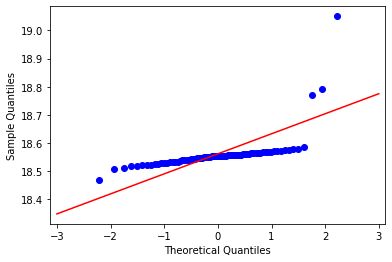

1st quartile of mag.outlier:  18.5373952724961
3rd quartile of mag.outlier:  18.56298225840465


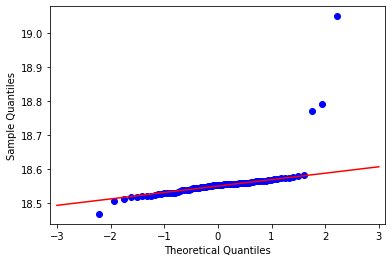

In [5]:
## QQ plot of mag.outlier
import pandas as pd
import numpy as np
import statsmodels.api as sm

a = pd.read_csv('../../data/01/IntroStat_demo.csv')
#print(a)

print ('Mean of mag.outlier: ',np.mean(a['mag.outlier']))
print ('Variance of mag.outlier: ',np.std(a['mag.outlier'])**2)

sm.qqplot(a['mag.outlier'])
plot_x = np.linspace(-3,3,num=100)
plt.plot(plot_x,np.mean(a['mag.outlier'])+np.std(a['mag.outlier'])*plot_x,'r-')
plt.show()

print ('1st quartile of mag.outlier: ',np.percentile(a['mag.outlier'],25))
print ('3rd quartile of mag.outlier: ',np.percentile(a['mag.outlier'],75))
## use linear algebra to figure out the line passing through the first and 3rd quartiles 
## 25th and 75th percentile corresponds to 0.675 sigma for a normal distribution
slope = (np.percentile(a['mag.outlier'],75)-np.percentile(a['mag.outlier'],25))/1.35
intercept = (np.percentile(a['mag.outlier'],75)+np.percentile(a['mag.outlier'],25))/2.
sm.qqplot(a['mag.outlier'])
plt.plot(plot_x,intercept+slope*plot_x,'r-')
plt.show()

Mean of mag.het:  18.548341155926813
Variance of mag.het:  0.002051771742037421


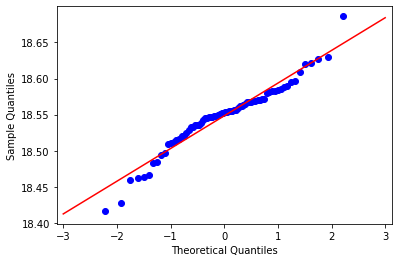

1st quartile of mag.het:  18.5292093668539
3rd quartile of mag.het:  18.570569962457924


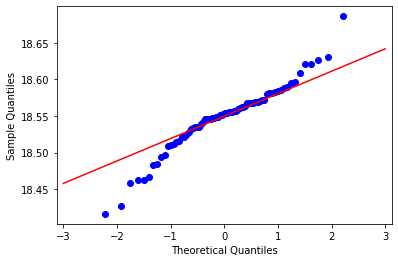

In [6]:
print ('Mean of mag.het: ',np.mean(a['mag.het']))
print ('Variance of mag.het: ',np.std(a['mag.het'])**2)

sm.qqplot(a['mag.het'])
plot_x = np.linspace(-3,3,num=100)
plt.plot(plot_x,np.mean(a['mag.het'])+np.std(a['mag.het'])*plot_x,'r-')
plt.show()

print ('1st quartile of mag.het: ',np.percentile(a['mag.het'],25))
print ('3rd quartile of mag.het: ',np.percentile(a['mag.het'],75))
## use linear algebra to figure out the line passing through the first and 3rd quartiles 
## 25th and 75th percentile corresponds to 0.675 sigma for a normal distribution
slope = (np.percentile(a['mag.het'],75)-np.percentile(a['mag.het'],25))/1.35
intercept = (np.percentile(a['mag.het'],75)+np.percentile(a['mag.het'],25))/2.
sm.qqplot(a['mag.het'])
plt.plot(plot_x,intercept+slope*plot_x,'r-')
plt.show()

## Discussion:

In the first dataset ('mag.outlier'), there are some extreme values (as seen in the Q-Q plot) and therefore the simple mean and variance does not represent the data well. A better way to estimate the data properties is to use the quantiles to remove the extreme values and derive general properties of the data. 

In the second dataset ('mag.het'), there are not extreme values, so the Q-Q plot is similar to that of a normal distribution. However, the data is still not a normal distribution. In this case, using the percentiles did not improve the estimates of the data properties. 

Mean of rescaled mag.het:  0.11479798948878467
Variance of rescaled mag.het:  0.823545774748479


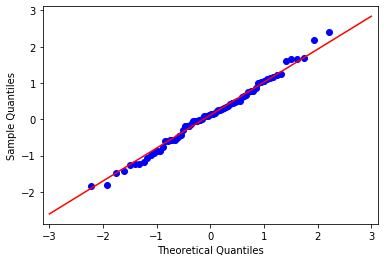

1st quartile of rescaled mag.het:  -0.5510125887859657
3rd quartile of rescaled mag.het:  0.6573012075923795


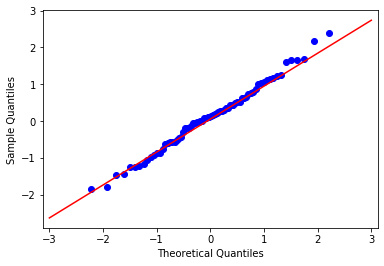

In [7]:
rescale_maghet = (a['mag.het']-np.mean(a['mag.het']))/a['mag.het.error']

print ('Mean of rescaled mag.het: ',np.mean(rescale_maghet))
print ('Variance of rescaled mag.het: ',np.std(rescale_maghet)**2)

sm.qqplot(rescale_maghet)
plot_x = np.linspace(-3,3,num=100)
plt.plot(plot_x,np.mean(rescale_maghet)+np.std(rescale_maghet)*plot_x,'r-')
plt.show()

print ('1st quartile of rescaled mag.het: ',np.percentile(rescale_maghet,25))
print ('3rd quartile of rescaled mag.het: ',np.percentile(rescale_maghet,75))
## use linear algebra to figure out the line passing through the first and 3rd quartiles 
## 25th and 75th percentile corresponds to 0.675 sigma for a normal distribution
slope = (np.percentile(rescale_maghet,75)-np.percentile(rescale_maghet,25))/1.35
intercept = (np.percentile(rescale_maghet,75)+np.percentile(rescale_maghet,25))/2.
sm.qqplot(rescale_maghet)
plt.plot(plot_x,intercept+slope*plot_x,'r-')
plt.show()

## Discussion:

In these plots, we plot the Q-Q plot with the the rescaled version of the data. The rescaled data is more similar to the normal distribution, so the Q-Q plot is almost a straight line. For data that follows the normal distribution, standard ways of evaluation (e.g. simple mean, simple variance, percentiles) are less biased. 

# Problem 3

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.


Split the data into LMC and SMC, and then again by mode F and 1, and plot the `W` on the y-axis vs `log(P1)` on x.
Fit or estimate straight lines to each of the four samples (you can use `statsmodels` `astropy` `scipy` `numpy`....)
(Yes, we've not covered fitting straight lines. That's OK.)

Compute the residuals of each sample to it's respective line. Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

Plot the residuals color coded by if they are positive or negative vs RA and Dec (just like a Hess diagram in Problem 1).

Finally, plot the residuals against the fitted `W` values, and just to anticipate the next homework assignment, also plot `log(P1) vs V-I`. Comment on what you are seeing.

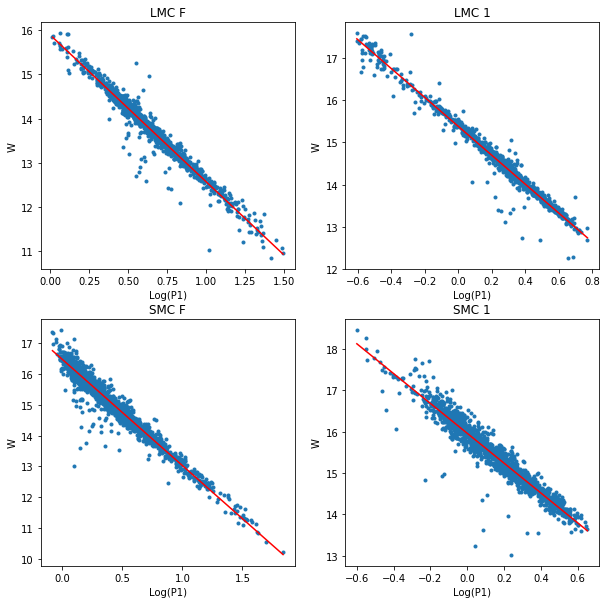

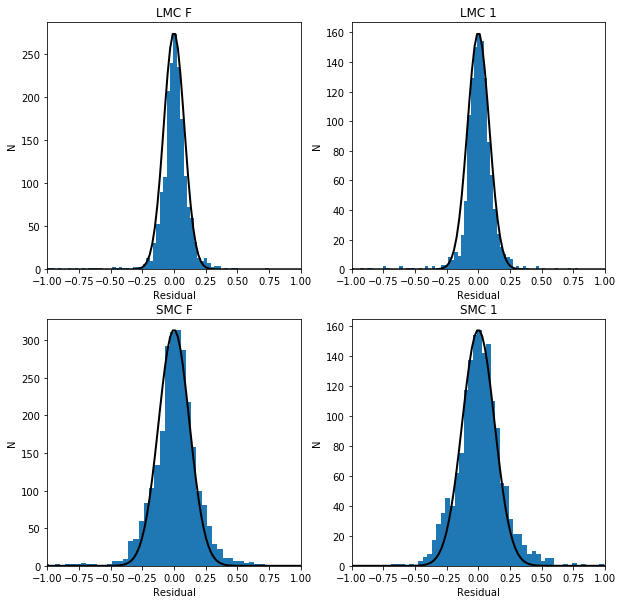

<Figure size 720x720 with 0 Axes>

In [25]:
from scipy.stats import norm

b = pd.read_csv('../../data/01/Cepheids.csv')

#split data by cloud and mode
i = 0
fig1 = plt.figure(figsize=(10,10))
fig2 = plt.figure(figsize=(10,10))
fig3 = plt.figure(figsize=(10,10))

for cloud in ['LMC','SMC']:
    for mode in ['F','1']:
        ax = fig1.add_subplot(2,2,i+1)

        ind = np.where(np.all([b['Cloud']==cloud,b['Mode']==mode],axis=0))[0]
        #print(ind)
        ax.plot(b['logP1'][ind],b['W'][ind],'.')
        z = np.polyfit(b['logP1'][ind],b['W'][ind], 1)
        fit1d = np.poly1d(z)
        plot_x = np.linspace(np.min(b['logP1'][ind]),np.max(b['logP1'][ind]),num=100)
        ax.plot(plot_x,fit1d(plot_x),'r-')
        ax.set_xlabel('Log(P1)')
        ax.set_ylabel('W')
        ax.set_title(cloud+' '+mode)
        
        bx = fig2.add_subplot(2,2,i+1)
        res = b['W'][ind]-fit1d(b['logP1'][ind])
        bx.hist(res,bins=100)
        myhist, bin_edges = np.histogram(res,bins=100)
        mu, std = norm.fit(res)
        plot_x = np.linspace(-1, 1, 100)
        plot_norm = norm.pdf(plot_x, mu, std/np.sqrt(np.pi))
        bx.plot(plot_x, plot_norm*np.max(myhist)/np.max(plot_norm), 'k', linewidth=2)      
        
        bx.set_xlim([-1,1])
        bx.set_xlabel('Residual')
        bx.set_ylabel('N')
        bx.set_title(cloud+' '+mode)

        
        i = i+1

## Discussion:

The residual histrogram shows that the residuals are not normal distributions. The W-log(P1) is more constrained with the LMC stars than the SMC stars. It might be because not all of the stars are at the exact same distance, and as SMC is further away, there are more residuals.

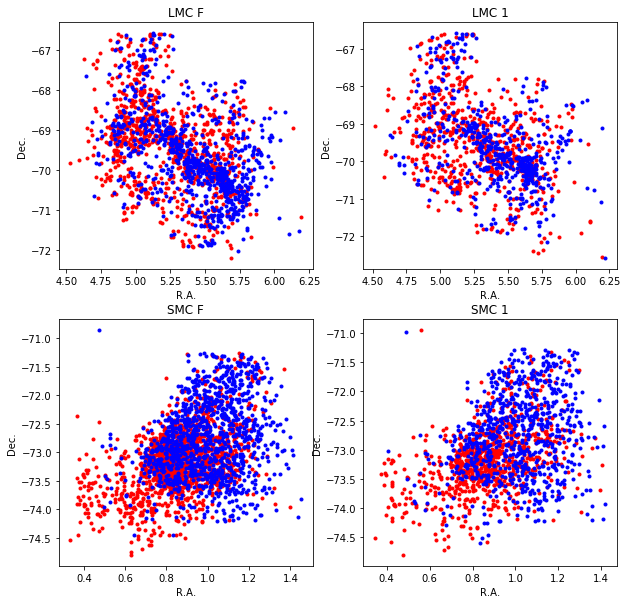

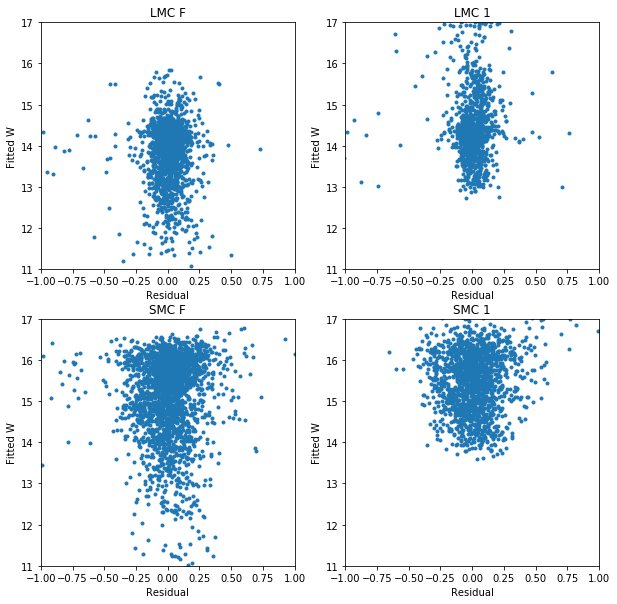

In [26]:
#print(b)
fig3 = plt.figure(figsize=(10,10))
fig4 = plt.figure(figsize=(10,10))

i = 0

for cloud in ['LMC','SMC']:
    for mode in ['F','1']:
    
        ind = np.where(np.all([b['Cloud']==cloud,b['Mode']==mode],axis=0))[0]
        ra = np.array(b['RA0'])[ind]
        dec = np.array(b['Decl0'])[ind]
        z = np.polyfit(b['logP1'][ind],b['W'][ind], 1)
        
        fit1d = np.poly1d(z)
        res = np.array(np.array(b['W'])[ind]-fit1d(np.array(b['logP1'])[ind]))
        ind_pos = np.where(res>=0)[0]
        ind_neg = np.where(res<0)[0]

        cx = fig3.add_subplot(2,2,i+1)
        cx.plot(ra[ind_pos],dec[ind_pos],'.',color='r')
        cx.plot(ra[ind_neg],dec[ind_neg],'.',color='b')
        cx.set_xlabel('R.A.')
        cx.set_ylabel('Dec.')
        cx.set_title(cloud+' '+mode)
        
        dx = fig4.add_subplot(2,2,i+1)
        dx.plot(res,fit1d(np.array(b['logP1'])[ind]),'.')
        dx.set_xlabel('Residual')
        dx.set_ylabel('Fitted W')
        dx.set_xlim([-1,1])
        dx.set_ylim([11,17])
        dx.set_title(cloud+' '+mode)
        
        i = i+1

## Discussion:

The positive and negative residuals are uniformly distributed in the LMC, but in SMC, the positive and negative residuals are gathered on different sides of the SMC. This shows the stars  are at different distance on different sides in the SMC (both mode F and 1 stars shows the same trend), which hints at its physical shape. Also the F and 1 mode Cepheids have different instrinsic properties as the fitted W are differet. Finally, the period of the Cepheids are correlated with the colors.

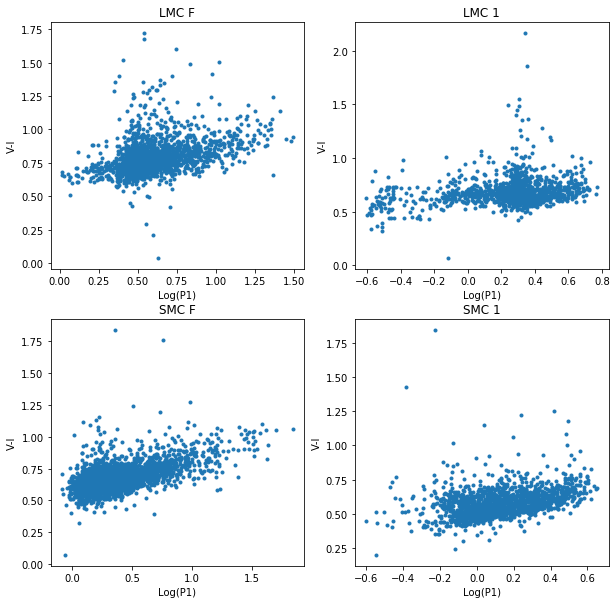

In [27]:
i = 0
fig = plt.figure(figsize=(10,10))
for cloud in ['LMC','SMC']:
    for mode in ['F','1']:
        ax = fig.add_subplot(2,2,i+1)
        ind = np.where(np.all([b['Cloud']==cloud,b['Mode']==mode],axis=0))[0]
        ax.plot(b['logP1'][ind],b['VI'][ind],'.')
        ax.set_xlabel('Log(P1)')
        ax.set_ylabel('V-I')
        ax.set_title(cloud+' '+mode)
        i = i+1